In [58]:
! pip install xgboost


In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold
data = pd.read_csv('train.csv')


# Testing Data

In [60]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [61]:

test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [62]:

col = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu','GarageYrBlt']
test = test.drop(columns=col)
test.shape


(1459, 73)

In [63]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

# EDA 

In [64]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [66]:
# to print the shape of the dataset
data.shape

(1460, 81)

In [67]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [68]:
# to print sum of the missing values of each column 
missing_values = data.isnull().sum()
print(missing_values[missing_values>0])


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [69]:
# GarageYrBlt and YearBlt are highly correlated with each other
# It is best to drop GarageYrBlt

In [70]:
# Drop the columns with 50% of null values
a = data.shape[0]/2

b = missing_values[missing_values>a]
#print(type(b))
col =  list(b.index)
col.append('FireplaceQu')
col.append('GarageYrBlt')
print("Columns with 50 % of the data with NULL values",col)
# Drop the columns
data = data.drop(columns=col)
data.shape

Columns with 50 % of the data with NULL values ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'GarageYrBlt']


(1460, 74)

# Filling missing values

In [71]:
data[['GarageType','BsmtQual']]
data['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [72]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['BsmtQual'].fillna(data['BsmtQual'].mode()[0],inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].mode()[0],inplace=True)
data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0],inplace=True)


In [73]:
# to print sum of the missing values of each column 
missing_values = data.isnull().sum()
print(missing_values[missing_values>0])

MasVnrArea       8
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


# Removing Outliers 

Outliers in LotArea

<Axes: xlabel='LotArea', ylabel='SalePrice'>

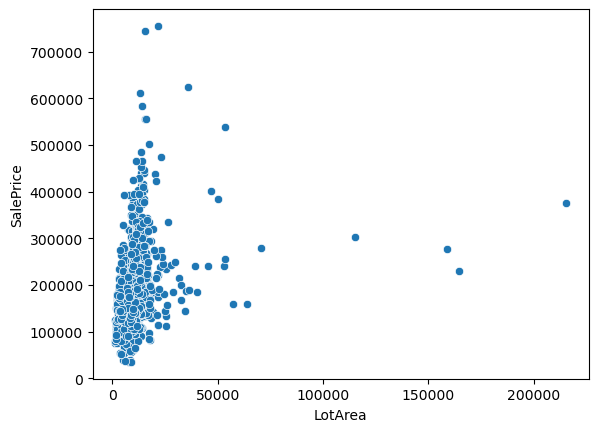

In [74]:

sns.scatterplot(x='LotArea', y='SalePrice', data=data)


In [75]:
values = data[data['LotArea']>100000]
print(values)
data = data.drop(values.index)

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
249  250          50       RL    70.049958   159000   Pave      IR2   
313  314          20       RL   150.000000   215245   Pave      IR3   
335  336         190       RL    70.049958   164660   Grvl      IR1   
706  707          20       RL    70.049958   115149   Pave      IR2   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
249         Low    AllPub   CulDSac  ...             0         0           0   
313         Low    AllPub    Inside  ...             0         0           0   
335         HLS    AllPub    Corner  ...             0         0           0   
706         Low    AllPub   CulDSac  ...             0         0           0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
249        0     500      6    2007        WD         Normal     277000  
313        0       0      6    2009        WD         Normal     375000  
335        0     700 

sns.scatterplot(x='FullBath', y='SalePrice', data=data)

<Axes: xlabel='FullBath', ylabel='SalePrice'>

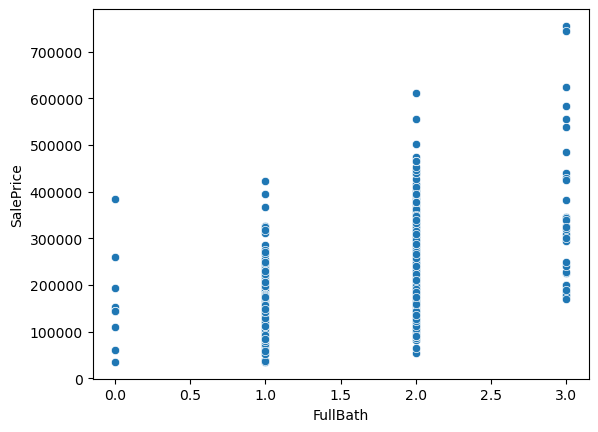

In [76]:
sns.scatterplot(x='FullBath', y='SalePrice', data=data)

<Axes: xlabel='HalfBath', ylabel='SalePrice'>

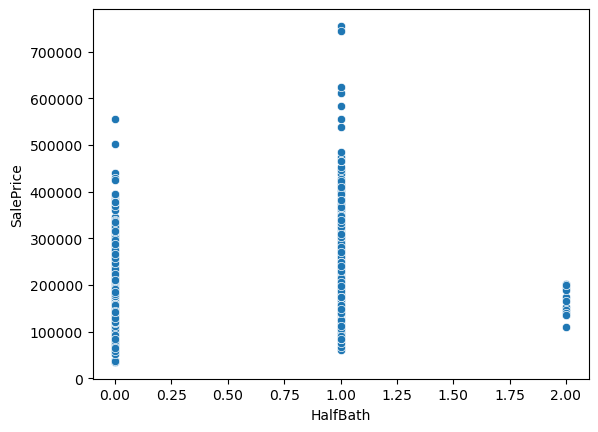

In [77]:
sns.scatterplot(x='HalfBath', y='SalePrice', data=data)

In [78]:
values1 = data[(data['HalfBath'] == 0) & (data['FullBath'] == 0) ]
values1
data = data.drop(values1.index)

In [79]:

print(data['SalePrice'].min())
print(data['SalePrice'].max())


34900
755000


In [80]:
data.shape

(1453, 74)

In [81]:
X = data.drop('SalePrice', axis=1)  # Replace 'target_column' with your target variable
y = data['SalePrice']
final = pd.concat([X,test],axis=0)

# Identify categorical columns
categorical_cols = final.select_dtypes(include=['object']).columns

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
final_encoded = pd.DataFrame(encoder.fit_transform(final[categorical_cols]))
final_encoded.index = final.index  # To align index after transformation

# Drop original categorical columns and concatenate the new encoded columns
final = final.drop(categorical_cols, axis=1)
final = pd.concat([final, final_encoded], axis=1)
final.columns = final.columns.astype(str)

from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Apply the imputer to your dataset
final = pd.DataFrame(imputer.fit_transform(final), columns=final.columns)

# Remove duplicated columns (if any)
final = final.loc[:, ~final.columns.duplicated()]






C:\Users\jalle\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
X = final.iloc[:1453,:]
test = final.iloc[1453:,:]

In [83]:
print(X.shape)
print(test.shape)

(1453, 246)
(1459, 246)


# CORRELATION

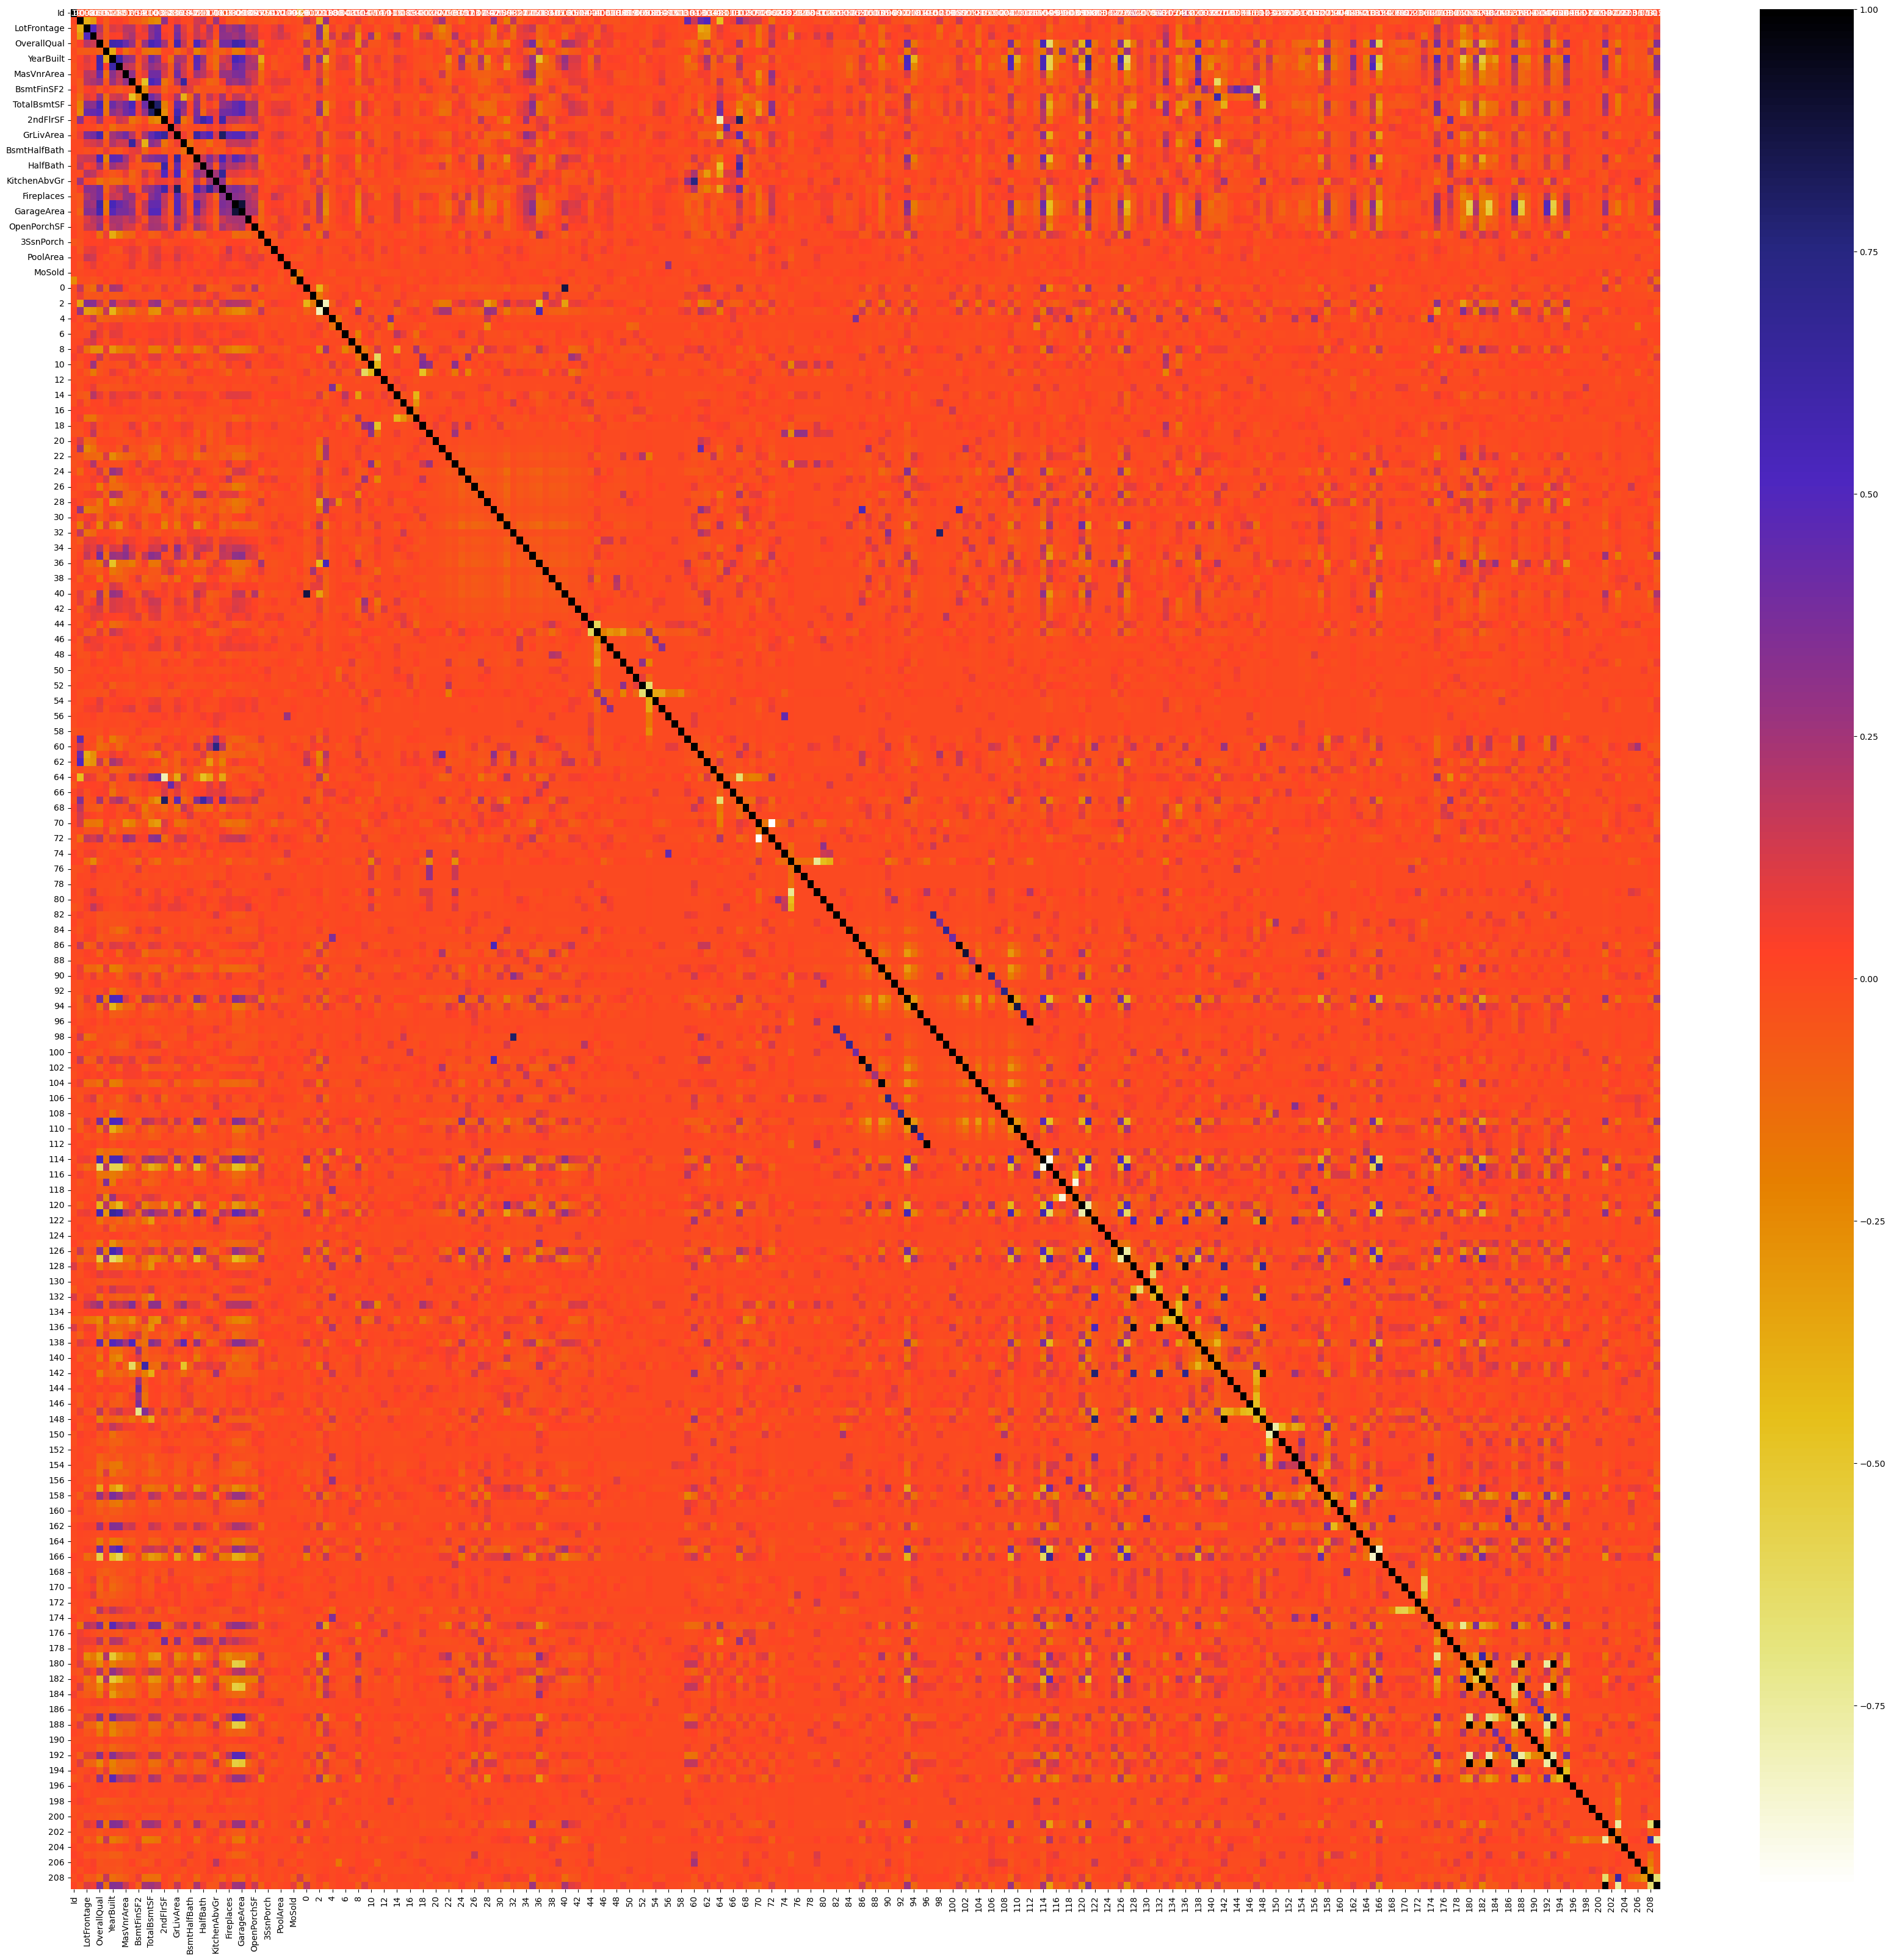

In [84]:
corr_values = final.corr()
plt.figure(figsize =(42,40))
sns.heatmap(corr_values, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [85]:
# Finding Multicollinearity among the columns
def correlation(dataset,threshold):
    col_corr = []
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > threshold:
                colname = corr_mat.columns[i]
                col_corr.append(colname)
    return col_corr

In [86]:
corr_fea = correlation(X,0.7)
len(corr_fea)

48

In [87]:
X_corr_free = X.drop(corr_fea,axis=1)
test_corr_free = test.drop(corr_fea,axis=1)

In [88]:
print(X_corr_free.shape)
print(test_corr_free.shape)

(1453, 210)
(1459, 210)


# Principal Component Analysis

pca = PCA(n_components=246)
pca.fit(final)
transfor_pca = pca.transform(final)
transfor_pca  = pd.DataFrame(transfor_pca)
print("Original Shape",final.shape)
print("PCA Shape",transfor_pca.shape)




X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:1453], test_size=0.2, random_state=42)

# Create and train Lasso model
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
print(feature_importance)

# Select features based on importance
selected_features = feature_importance[feature_importance != 0]

print(selected_features)
X = X[selected_features.index]

# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr_free)
X_corr_free = pd.DataFrame(X_scaled, columns=X_corr_free.columns)
test_scaled = scaler.fit_transform(test_corr_free)
test_corr_free = pd.DataFrame(test_scaled, columns=test_corr_free.columns)

X_corr_free

# Variance Threshold

In [89]:
var = VarianceThreshold(threshold = 0)
var.fit(X_corr_free)

VarianceThreshold(threshold=0)

In [90]:
var_fea = [column for column in X_corr_free.columns 
           if column not in X_corr_free.columns[var.get_support()]]
var_fea

['4', '13', '96', '112', '128', '132', '136', '167', '174', '204']

In [91]:
X_var_free = X_corr_free.drop(var_fea,axis=1)
test_var_free = test_corr_free.drop(var_fea,axis=1)

In [92]:
print(X_var_free.shape)
print(test_var_free.shape)

(1453, 200)
(1459, 200)


# Mutual Information Gain for Regression

In [93]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_var_free,y)
mutual_info

array([0.00000000e+00, 2.75140580e-01, 1.91724562e-01, 1.71572854e-01,
       5.71683388e-01, 1.10176436e-01, 3.66781675e-01, 2.51069128e-01,
       1.01198995e-01, 1.51506015e-01, 0.00000000e+00, 1.20956592e-01,
       3.64711760e-01, 2.01129095e-01, 1.08159019e-02, 4.75505160e-01,
       2.84710048e-02, 1.51308647e-02, 2.49904707e-01, 8.18954700e-02,
       7.99098297e-02, 1.31219366e-02, 1.64532159e-01, 3.69880984e-01,
       9.91144840e-02, 1.42699480e-01, 2.22999795e-02, 0.00000000e+00,
       6.23904691e-03, 2.70716148e-03, 4.13348028e-03, 0.00000000e+00,
       0.00000000e+00, 2.72230887e-02, 6.32974735e-04, 5.30999814e-02,
       0.00000000e+00, 2.67062675e-02, 0.00000000e+00, 7.95095650e-02,
       9.24667827e-03, 0.00000000e+00, 2.78758161e-02, 0.00000000e+00,
       1.87380698e-02, 0.00000000e+00, 0.00000000e+00, 4.35781959e-03,
       1.10648491e-02, 0.00000000e+00, 4.20891658e-03, 4.31331481e-03,
       1.99169938e-02, 8.24870631e-03, 4.13309646e-02, 8.15823990e-03,
      

In [94]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_var_free.columns
mutual_fea = mutual_info[mutual_info==0].index
mutual_fea

Index(['Id', 'BsmtFinSF2', '3SsnPorch', 'MoSold', 'YrSold', '5', '7', '10',
       '12', '15', '16', '19', '44', '48', '49', '51', '55', '56', '58', '68',
       '71', '75', '78', '79', '80', '84', '90', '92', '99', '103', '105',
       '107', '111', '117', '118', '123', '124', '130', '134', '143', '145',
       '151', '152', '163', '169', '172', '173', '176', '197', '200', '202'],
      dtype='object')

In [95]:
X_final = X_corr_free.drop(mutual_fea,axis=1)
test_final = test_corr_free.drop(mutual_fea,axis=1)

In [96]:
print(X_final.shape)
print(test_final.shape)

(1453, 159)
(1459, 159)


# Building a RandomForestRegressor Model

In [109]:

rf_regressor = RandomForestRegressor(random_state=42)


In [110]:
from sklearn.model_selection import GridSearchCV


param_RFR = {
    'n_estimators': [200,250,300],
    'max_depth': [5,7,9],
    'min_samples_split': [2, 5, 10],
    #'max_features': ['auto', 'sqrt', 'log2'],
}

Grid_RFR = GridSearchCV(estimator=rf_regressor, param_grid=param_RFR, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the grid search to the training data
Grid_RFR.fit(X_final, y)





GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 250, 300]},
             scoring='neg_mean_squared_error')

In [111]:
# Get the best parameters and the corresponding score
best_params_RFR = Grid_RFR.best_params_
best_score_RFR = Grid_RFR.best_score_
best_model_RFR = Grid_RFR.best_estimator_


print(f"Best parameters found: {best_params_RFR}")
print(f"Best cross-validation score: {best_score_RFR}")
print(f"Best model: {best_model_RFR}")
(-best_score_RFR)**(1/2)

Best parameters found: {'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: -891303098.5061091
Best model: RandomForestRegressor(max_depth=9, min_samples_split=5, n_estimators=200,
                      random_state=42)


29854.69977249996

In [112]:
best_model_RFR.fit(X_final,y)
pred_rf = best_model_RFR.predict(test_final)


In [113]:
pred = pd.DataFrame(pred_rf)
a = pd.read_csv('sample_submission.csv')
file = pd.concat([a['Id'],pred],axis=1)
file.columns = ['Id','SalePrice']
file.to_csv('RandomForestRegressorsubmisssion.csv',index=False)

# Boosting

In [114]:
from xgboost import XGBRegressor

In [115]:
param_grid = {
    'n_estimators': [300,350,400],
    'max_depth': [2,3],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.2, 0.4, 0.6]
}

xgb = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_final, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [116]:

print(best_params)
best_score = grid_search.best_score_
print(best_score)
(-best_score)**(1/2)

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
-632735428.5240331


25154.232815254632

In [117]:
predictions = best_model.predict(test_final)


In [118]:
predictions = pd.DataFrame(predictions)
a = pd.read_csv('sample_submission.csv')
file = pd.concat([a['Id'],predictions],axis=1)
file.columns = ['Id','SalePrice']
file.to_csv('Boostingsubmisssion.csv',index=False)